# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     746.7
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           5.26e-39
Time:                        11:33:36   Log-Likelihood:                -4.6654
No. Observations:                  50   AIC:                             17.33
Df Residuals:                      46   BIC:                             24.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0486      0.094     53.484      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.58666403  5.06119349  5.49628219  5.86411419  6.14691219  6.33985826
  6.45188544  6.50421005  6.5268459   6.55367312  6.61687176  6.74163468
  6.94202842  7.21868216  7.5586843   7.93770381  8.32398776  8.68357824
  8.98589152  9.2087429   9.34199158  9.38920677  9.36708128  9.30268893
  9.22903641  9.17964034  9.18302065  9.25801478  9.41068275  9.63331155
  9.90568231 10.19839226 10.47768549 10.71099895 10.87231247 10.94642382
 10.93144637 10.83911906 10.69287773 10.5240047  10.36648911 10.25144269
 10.2019881  10.22946002 10.33154285 10.49265114 10.6864903  10.88037667
 11.04060737 11.13799759]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.14356089 11.01532022 10.77329124 10.4630871  10.14475074  9.87805429
  9.7078648   9.65315916  9.70237794  9.81625555]


## Plot comparison

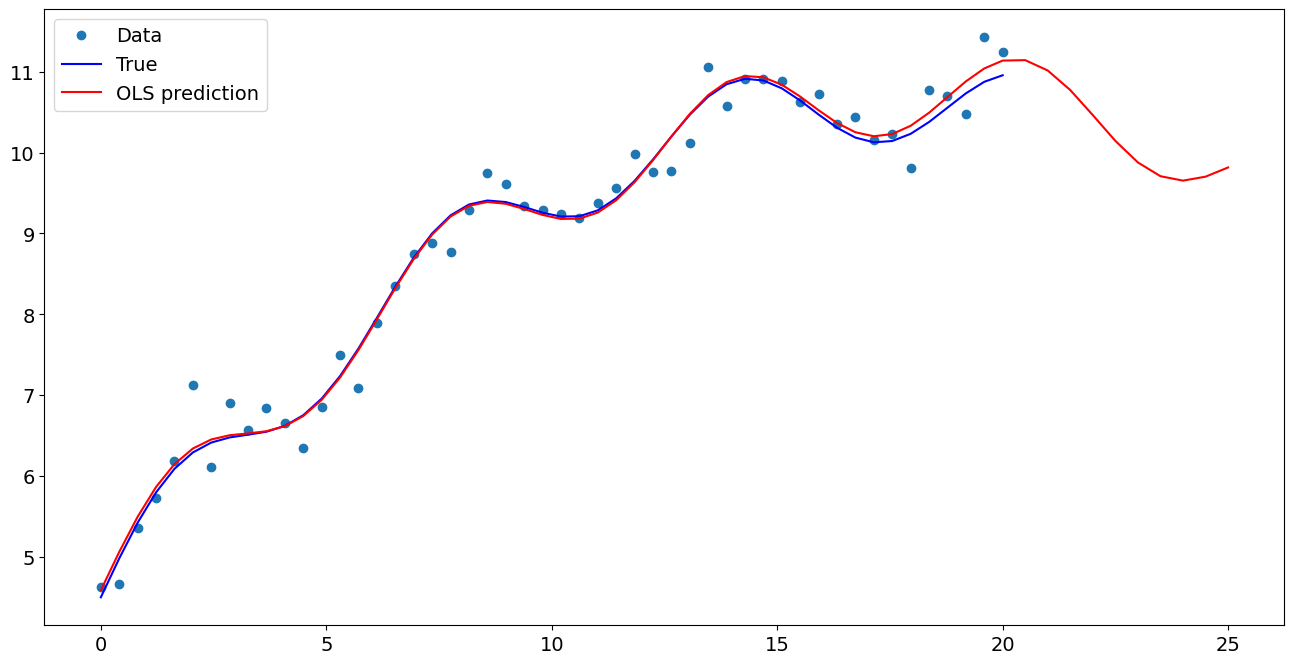

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.048579
x1                  0.489035
np.sin(x1)          0.510392
I((x1 - 5) ** 2)   -0.018477
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.143561
1    11.015320
2    10.773291
3    10.463087
4    10.144751
5     9.878054
6     9.707865
7     9.653159
8     9.702378
9     9.816256
dtype: float64